# Initial Political Insights "product"

## Step 1) Lower your expectations
## Step 2) Repeat Step 1

As of 10/17, this notebook takes a user's address and dumps out names, pictures, and effectiveness & bipartisanship graphs. The graphs will display data back as far as the 113th congress if any member has a history that far back.

Concerns:
- The method used right now to turn Google Civic API results into the member IDs required for ProPublica feels like a hot mess.
- There is no error handling whatsoever
- The display is ugly
- Still don't have data on top 5-ish topics for bill activity
- Probably lots of other stuff, but I'm fried

In [42]:
#these magic statements can be removed once development is complete
%reload_ext autoreload
%autoreload 2

#custom-built module!
import api_utils

#pre-fab modules - basically the mobile homes of import statements
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from ast import literal_eval
%matplotlib inline

In [31]:
# This executable .py performs batch processing on bulk legislative data
# Only run this command if you want to re-create (or update) effectiveness.csv

# It takes a couple minutes to run if you don't comment out the bulk_update() function call
# within that file (line 299)

!python bulk_processing.py

In [32]:
# TESTING CELL

# Read in bulk data
df = pd.read_csv('./effectiveness.csv')

In [33]:
#test_dict = {}

#sorted(test_dict, key=test_dict.__getitem__)
#test_dict.keys()

#[][:5]

In [34]:
df.head()

,id,bi_sponsor_bi,bi_sponsor_count,cosponsor_count,cosponsor_normalized,cosponsor_rank,dw_nominate,missed_votes_pct,name,party,...,state,top_cosponsor_subjects,top_sponsor_subjects,total_votes,votes_with_party_pct,color,size,bi_pct,chamber,congress
0,L000174,3,11,185,0.847697,7,-0.375,1.90,Patrick Leahy,D,...,VT,"[(Health, 27), (Crime and law enforcement, 22)...","[(Government operations and politics, 2), (Tax...",263.0,96.51,blue,20,0.272727,senate,115
1,B001288,9,35,252,0.721729,33,-0.588,0.76,Cory Booker,D,...,NJ,"[(International affairs, 30), (Health, 29), (C...","[(Crime and law enforcement, 8), (Government o...",263.0,83.91,blue,20,0.257143,senate,115
2,W000779,14,53,211,0.702874,37,-0.314,0.00,Ron Wyden,D,...,OR,"[(International affairs, 23), (Government oper...","[(Taxation, 7), (Public lands and natural reso...",263.0,89.35,blue,20,0.264151,senate,115
3,S001184,10,16,91,0.664336,50,0.669,0.38,Tim Scott,R,...,SC,"[(Labor and employment, 11), (Finance and fina...","[(Taxation, 4), (Sports and recreation, 2), (C...",263.0,98.47,red,20,0.625000,senate,115
4,M001176,3,15,258,0.652511,47,-0.436,1.14,Jeff Merkley,D,...,OR,"[(International affairs, 28), (Health, 23), (T...","[(Energy, 4), (Health, 3), (Native Americans, ...",263.0,86.54,blue,20,0.200000,senate,115


In [71]:
def show_metrics(df, member_id):
    '''helper function to produce hideous visualizations
    come to think of it, that's not very helpful at all!'''
    
    # Determine applicable chamber and congress(es) based on member id
    congresses = sorted(df[df.id == member_id].congress.unique())
    chamber = sorted(df[df.id == member_id].chamber.unique())[0]
    
    # Loop through every applicable congress for the given member_id
    for congress in congresses:
        # Filter the dataframe to only the data we want to plot
        temp_df = df[(df.congress == congress) & (df.chamber == chamber) & (df.bi_sponsor_count != 0)]
        #member_index = np.where(temp_df.id == member_id)[0][0]
        colors = []
        for i in range(len(temp_df.color)):
            if list(temp_df.id)[i] == member_id:
                colors.append('green')
            else:
                colors.append(list(temp_df.color)[i])
        
        # Build the plots
        plt.figure(figsize=(10, 10))
        
        plt.subplot(221)
        plt.scatter(temp_df.sponsor_rank, temp_df.cosponsor_rank, color=colors, s=temp_df['size'])
        plt.xlabel('sponsorship rank')
        plt.ylabel('cosponsorship rank')
        ax = plt.gca()
        ax.set_xlim([0,max(temp_df.sponsor_rank)+2])
        ax.invert_xaxis()
        ax.set_ylim([0,max(temp_df.cosponsor_rank)+2])
        ax.invert_yaxis()
        plt.title('%s %s Effectiveness Rankings' %(congress, chamber))

        plt.subplot(222)
        red = temp_df[temp_df.color == 'red']
        blue = temp_df[temp_df.color == 'blue']
        plt.hist(red.bi_pct, color='Red', alpha=0.5)
        plt.hist(blue.bi_pct, color='Blue', alpha=0.5)
        plt.title('Bill Sponsor Bipartisanship')
        plt.xlabel('portion of bills sponsored w/bipartisan support')
        plt.ylabel('count')
        pct = list(temp_df[temp_df.id == member_id]['bi_pct'])[0]
        plt.axvline(pct, color='green', linestyle='dashed', linewidth=10)
        
        plt.show()
        
        print ''
        print 'Top sponsorship topics:'
        topics = list(df[(df.id == member_id) & (df.congress == congress)].top_sponsor_subjects)[0]
        for topic in topics.replace("[(","").replace(")]","").split("), ("):
            print topic
            
        print ''
        print 'Top cosponsorship topics:'
        topics = list(df[(df.id == member_id) & (df.congress == congress)].top_cosponsor_subjects)[0]
        for topic in topics.replace("[(","").replace(")]","").split("), ("):
            print topic

What is your address?
e.g.: 1313 Disneyland Dr, Anaheim, CA 92802
Please type your address here: 1313 Disneyland Dr, Anaheim, CA 92802

chamber: senate
name: Kamala D. Harris


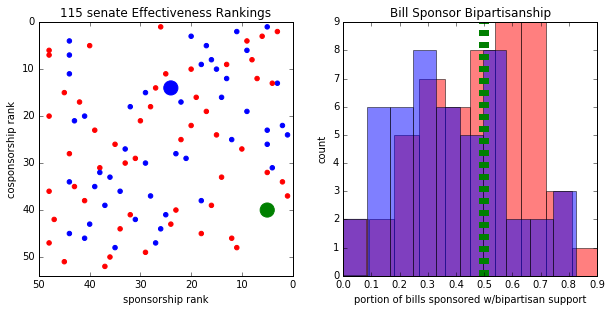


Top sponsorship topics:
Public lands and natural resources, 2
Crime and law enforcement, 1
Water resources development, 1
Congress, 1
Immigration, 1

Top cosponsorship topics:
Health, 16
Civil rights and liberties, minority issues, 14
Immigration, 13
Crime and law enforcement, 12
Labor and employment, 9


chamber: senate
name: Dianne Feinstein


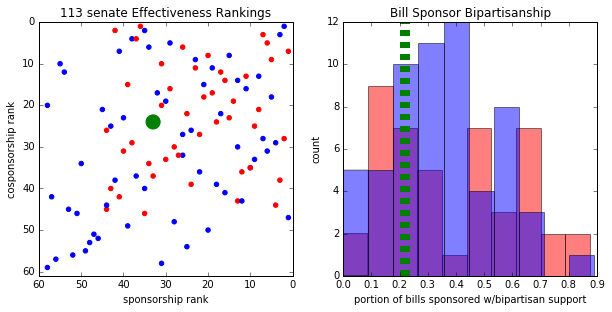


Top sponsorship topics:
Private legislation, 12
Crime and law enforcement, 8
Armed forces and national security, 7
Health, 5
Public lands and natural resources, 4

Top cosponsorship topics:
Crime and law enforcement, 34
Health, 32
Armed forces and national security, 24
International affairs, 23
Education, 18


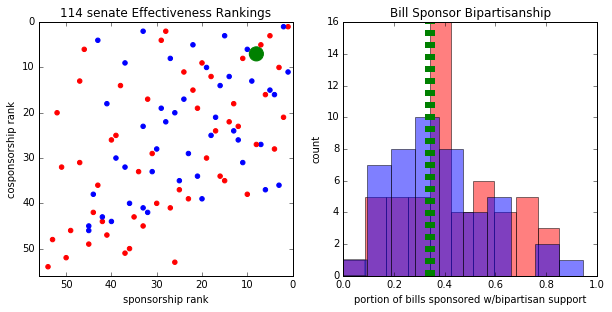


Top sponsorship topics:
Crime and law enforcement, 11
None, 9
Health, 6
Armed forces and national security, 5
International affairs, 5

Top cosponsorship topics:
Health, 50
Crime and law enforcement, 47
International affairs, 32
Armed forces and national security, 30
Education, 26


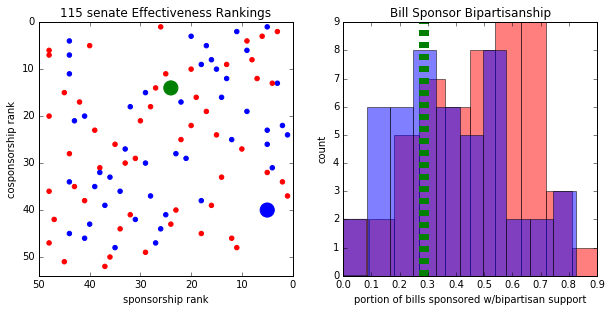


Top sponsorship topics:
None, 9
Crime and law enforcement, 5
Immigration, 5
Health, 4
Public lands and natural resources, 4

Top cosponsorship topics:
Crime and law enforcement, 39
International affairs, 27
Health, 20
Government operations and politics, 19
Armed forces and national security, 17


chamber: house
name: J. Luis Correa


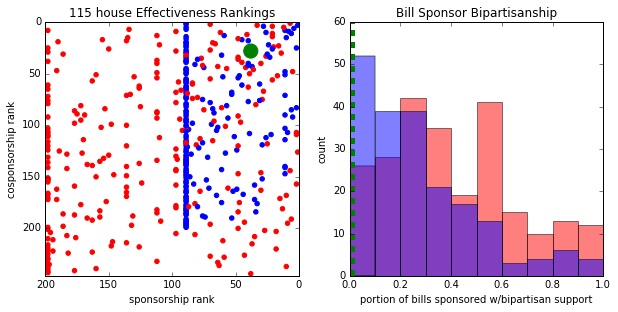


Top sponsorship topics:
Government operations and politics, 2
Armed forces and national security, 2
Immigration, 2
Science, technology, communications, 1
Commerce, 1

Top cosponsorship topics:
Armed forces and national security, 32
Immigration, 22
Government operations and politics, 21
Health, 15
Taxation, 14




In [72]:
# Read in bulk data
df = pd.read_csv('./effectiveness.csv')

# Collect user's address
print 'What is your address?'
print 'e.g.: 1313 Disneyland Dr, Anaheim, CA 92802'
address = raw_input('Please type your address here: ')
print ''

# Instantiate the class required to translate the address
g = api_utils.Google()
my_reps = g.ids_from_address(address)

# Update the size attributes for "my" reps
all_ids = []
for chamber in my_reps:
    for member_id in my_reps[chamber]:
        all_ids.append(member_id)
for m_id in all_ids:
    if m_id in list(df.id):
        row_index = df.id == m_id
        df.loc[row_index,'size'] = 200

# Display representatives and collect IDs in single list
#all_ids = []
for chamber in my_reps:
    for member_id in my_reps[chamber]:
        #all_ids.append(member_id)
        print 'chamber: %s' %chamber
        print 'name: %s' %my_reps[chamber][member_id]['name']
        display(Image(url=my_reps[chamber][member_id]['img_url'], height=165, width=135))
        print ''
        show_metrics(df, member_id)
        print ''
        print ''

## What the hell am I looking at?

### Effectiveness Rankings
- We examine _every_ bill in the dataset and assign a score based on how far it got
- Those scores are distributed out to that bill's sponsor and cosponsors
- Every member is ranked against everyone else in their chamber and _only_ in their own party
- Top right is best, bottom left sucks (axes are reversed)
- The green dot shows this member's position

### Bipartisanship
- For every bill that, we say it has "bipartisan support" if at least 25% of its cosponsors are members of the opposite party
- For every member, we can say that _X%_ of their bills are bipartisan
- That percentage is plotted separately for dems and republicans
- The dashed line indicates where this particular member falls on the distribution

In [14]:
pp = api_utils.ProPublica()

for i in all_ids:
    member = pp.get_member(i)
    print member['first_name'], member['last_name'],
    print 'fec ID:', member['roles'][0]['fec_candidate_id']

Marco Rubio fec ID: S0FL00338
Bill Nelson fec ID: S8FL00166
Ted Deutch fec ID: H0FL19080


In [2]:
pp.get_member_fec('S0CA00199', '2016')

NameError: name 'pp' is not defined